# Update Log

### 09/22/2024

I haven't touched much of this project in a while due to the start of classes. I have been reading over the project to try to refresh a few of the materials that need work. So far I have identified that the next step is to try to get the data set up similar to the CIFAR-10 dataset so that I can utilize a lot of the infrastructure of the CIFAR-10 dataset to undergo machine learning.

For each saved trace I should have an associated average SNR label. I should have a dictionary with two entries {data, labels} Where the nth label corresponds to the nth data entry, which itself should be a [eventnum,data]. After this, I plan to bin these arrays and save them into batches.

But what should data be? Right now, data is a [4(num_channels),2(t,V),ndata]. And we may need to keep it that way, as the number of data points are inconsistent from the NuRadioMC.

### 09/29/2024

I started working on the bin matrix, I made the `bin_matrix() function, which will automatically set up my data in [4,bins] matrix and has an input "plotting" that will print out a heatmap of the matrix.

TODO: Finish commenting the function. And I will want to setup a way to do this recursively with all of the data. I also should start looking into how to calculate the mean SNR.

### 10/7/2024

Started work on step4, realized that calculate noise function works with bins. I am now working on the overall saving of these binned matrices + their mean SNR in an orderly fashion. I calculate the SNR by max V / rms noise, however I am not sure if the noise should be from the bins or from the original samples.

16 channels in simstation because of em and hadronic showers and because of direct and refracted ray tracing solutions. Sum everything up to obtain max voltage. 

Try to look for sum of all channels function.
Try to look for noise parameter.

### 11/2/2024

I am looking into all of the different functions of NuRadioMC. I have discovered many useful things such as an integrated hilbert_voltage function, SNR, etc. 

Although it is not possible to index events and stations and channels. They can be iterated over with the next() function. To restart interation from 0, simply restate the iterable call. Perhaps a python package exists that streamlines this, but for now this is enough.

I also discovered that the simstation has raytracing channels, particle channels and id channels separations, which may be useful for future calculations.

In the essence of time, and because I believe that the CNN's main objective is to accurately measure the "REAL" SNR with noise included, I have decided to utilize the "SNR" parameter of the channels.

I have started construction of the CIFAR-10 dictionary which will have the shape of {data, SNR}

Did a big overhaul of most things.
Added new aliases to streamline process:

alias gostepsCNN='cd /data/i3home/ssued/RNOGCnn/CNN_steps'
alias goCNN='cd /data/i3home/ssued/RNOGCnn'
alias runstep1='python /data/i3home/ssued/RNOGCnn/CNN_steps/step1_generate_event_list.py'
alias runstep2='python /data/i3home/ssued/tutorials-rnog/plot_sim_event/step2_run_simulation.py'
alias runstep3='python /data/i3home/ssued/RNOGCnn/CNN_steps/step3_save_hilbert_and_SNR.py'
alias runstep4='/data/i3home/ssued/RNOGCnn/CNN_steps/step4_save_binned_data.py'

Also finished up data processing. I decided to use integrated power as it was stated by my mentor that it is similar to SNR for hilbert and because it came prepacked from NuRadioMC.

Have to debug step 4 and next step is starting on the CNN


### 11/3/2024

Im basically done with the data processing part. We can begin with data collection, but I will have to make everything much more streamlined and pretty.

TO PRESENT:

 Wrote aliases to streamline process in my shell, maybe not so useful in condor.
> runstep1, runstep2, runstep3, runstep4

 step1: setup simulation, randomness because seed = 0
 step2: run simulation, random noise generated
 step3: Will save dictionary with {mean_integrated_power,data} using functions native to NuRadioMC
 step4: Will open the saved dictionary, obtain the integrated power and use pre-built functions bin_matrix and bin_v to bin the voltage
which will then be saved to a new: {mean_integrated_power,bin_time,data} dictionary

Decided to save integrated power as it was stated that it was similar to SNR for bin hilbert.


### 11/17/2024

Done with data processing. Cut out fourth step per request of my mentor and decided to simply make the third step bin and save the data, RAW DATA WILL NOT BE SAVED now.

Also modified mean_integrated_power to peak_amplitude, as according to the NuRadioMC code, peak_amplitude = SNR

## 11/24/2024

Huge changes, I finally understood how to setup and run my steps on condor. I still have a lot of things to flesh out:
* How do I submit multiple of the same request? Workaround solution right now.
* SSH for condor? Why is it a shell?
* How do I establish what specs to utilize for these requests?
* Not sure how to establish checks in case my code breaks. Will it halt incase it fails? Or will it keep going with the next step, if so thats bad.

All of the changes are in the "jobs" folder that I added to the CNN_steps file. I am not sure if I should gitignore this folder however, because it doesn't really contain any real code, just how to run it in condor00. Right now, the code runs and cycles the files in the "data" folder. I would probably benefit from making my file outputs for the dagman more concise/easier to read but I am not sure yet how.

request_memory no more than 1 gb
request_disk no more than 1 gb

## 12/21/2024

Checklist for Winter (I will update every Monday):

**(Week Dec.23 - Dec. 27)** Figure out trace data storage / Implement CNN
* Figure out DAGMAN multiple jobs
* Figure out memory accomodations
* Corroborate traces are being saved properly through condor
* Work on CIFAR10 replica model

**(Week Dec.30 - Jan. 3)** Finish trace data storage / Work on test CNN
* Finish step 4 + DAGMAN multiple jobs
* Figure out memory accomodations
* Corroborate traces are being saved properly through condor
* Work on CIFAR10 replica model

**(Week Jan. 6 - Jan. 10)** Hopefully begin work on reconstruction CNN

**(Week Jan. 13 - Jan. 17)** TBA

**(Week Jan. 20 - Jan. 24)** TBA

## 12/23/2024

I have begun working on consolidating the data. I also would like to make sure I can test certain things easily, so I will invest some time into that as well.

## 12/24/2024
I made a grave mistake yesterday and accidentally deleted an important file without any backup. I have now rebuilt it so all should be fine, I even included a few upgrades.

CNN_steps file now has:
* symdata: This file is where the data files for the simulations are stored. Everytime a simulation is run, the files are overwritten but this cycle is contained inside of this file.
* eventdata: This file contains all of the data produced by step3
* jobs: This file contains anything related to jobs and DAGMAN

For using condor:
* first ssh condor00
* Use alias gotojobs to go to the job directory
* type condor_submit_dag -f dagman.dag

Next steps:
* Write step 4 which will periodically save the created eventbatch_x files to the cummulative eventbatch dictionary.
* Begin CNN implementation with event_dict.pkl events.

## 12/29/2024

Have made considerable progress on data processing.

Additions:
* Modified utils.py to include a conjoin events function used in step 4.
* Wrote step 4
* Added a new "create_dagman.py" file that will create a dagman.dag file with multiple simulation runs. (NOT FINISHED, RIGHT NOW WILL RUN STEP 4 after every simulation which is not ideal.)

Next steps:
* Finish create_dagman.py and verify datastorage works.
* Begin CNN!!

## 12/30/2024

Observations:
* For the DAGMAN, CHILD and PARENT dependencies order does not matter.
* watch -n0 "command" will periodically run a command, good for watching condor queue.

Changes:
* Modified utils.conjoinevents() so that it would not create a new dictionary everytime, heavily speeding up time for bigger number dictionaries.
* Finished DAGMAN steps!

Issues:
* Cannot run ONE simulation in the create_dagman.py file
* Have not looked at memory and GPU necessities yet
* Too many damn files for jobs/dagman! How to organize?
* Comment step4

## 12/30/2024

Observations:
* For the DAGMAN, CHILD and PARENT dependencies order does not matter.
* watch -n0 "command" will periodically run a command, good for watching condor queue.

Changes:
* Modified utils.conjoinevents() so that it would not create a new dictionary everytime, heavily speeding up time for bigger number dictionaries.
* Finished DAGMAN steps!

Issues:
* Cannot run ONE simulation in the create_dagman.py file ✅
* Have not looked at memory and GPU necessities yet ✅
* Too many damn files for jobs/dagman! How to organize? ❔
* Comment step4 ✅

## 1/2/2025

According to testing, maximum memory consuption is step2 with 225MB, I am limiting memory requirements to 400MB, which should be enough. I have not yet found a way to organize the dagfiles, but for now it should be ok. I also suppressed the output of individual jobs to limit file sizes.

**Observation**
* Will have to clear out dagman. and job. files lest they get big. After every simulation, the job data will be appended.

## 1/4/2025

**Observations**
* Pytorch has no cuda. Gotta work on that.

## 1/6/2025

Continuing CNN learning. I am watching CodeCamps full course on CNN: https://www.youtube.com/watch?v=V_xro1bcAuA&t=18625s

**Issues**
* Still have to figure out the Cuda.
* DAGMAN currently waits for previous steps to finish before starting the next. This is inneficient, There should only be parent child relationships for each subsequent steps, not for steps from following or preceding simulations. Lastly, step4 should be a child of all other steps.

Checklist for Winter (I will update every Monday):

**(Week Dec.23 - Dec. 27)** Figure out trace data storage / Implement CNN
* Figure out DAGMAN multiple jobs
* Figure out memory accomodations
* Corroborate traces are being saved properly through condor
* Work on CIFAR10 replica model

**(Week Dec.30 - Jan. 3)** Finish trace data storage / Work on test CNN
* Finish step 4 + DAGMAN multiple jobs
* Figure out memory accomodations
* Corroborate traces are being saved properly through condor
* Work on CIFAR10 replica model

**(Week Jan. 6 - Jan. 10)** Test CNN learning and implementing
* Fix DAGMAN child/parent relationships.
* Finish Youtube Video and hopefully get CNN running
* Get test CNN up and running

**(Week Jan. 13 - Jan. 17)** TBA

**(Week Jan. 20 - Jan. 24)** TBA


## 1/9/2025

* Cuda support is still not available, tried running: ```conda install pytorch torchvision torchaudio pytorch-cuda=12.4 -c pytorch -c nvidia``` but still does not work.
* Ive updated my conda environment to include pytorch, matplotlib, scipy and pandas.
* Added ctrl+shift+p keybind to toggle copilot comments on/off

I have fixed DagMan, now will run multiple steps at once.

## 1/11/2025

Still grinding out the PyTorch tutorial, I am understanding a lot. I will start with computer vision and dataloaders in the next session. Also hopefully in two sessions I will begin with convolutional neural networks!

** To Do:**

Read this article: https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

## 1/15/2025

* Continued work on Pytorch, finally getting into DataLoader and CNNs
* Going to require some help with setting up the CUDA environment.

* Issue: When running multiple steps, many simulations were run utilizing the same hdf5 file. This caused the file to be opened by multiple threads at the same time, which is not allowed. To fix this:
    * I added an argument in step 1 which includes the step number, now hdf5 files will have a corresponding suffix according to their number.
    * Step 2 will then look at their corresponding file, open it and do work. However, there still seems to be an issue with multiple files.

Checklist for Winter (I will update every Monday):

**(Week Dec.23 - Dec. 27)** Figure out trace data storage / Implement CNN
* Figure out DAGMAN multiple jobs
* Figure out memory accomodations
* Corroborate traces are being saved properly through condor
* Work on CIFAR10 replica model

**(Week Dec.30 - Jan. 3)** Finish trace data storage / Work on test CNN
* Finish step 4 + DAGMAN multiple jobs
* Figure out memory accomodations
* Corroborate traces are being saved properly through condor
* Work on CIFAR10 replica model

**(Week Jan. 6 - Jan. 10)** Test CNN learning and implementing
* Fix DAGMAN child/parent relationships.
* Finish Youtube Video and hopefully get CNN running
* Get test CNN up and running

**(Week Jan. 13 - Jan. 17)** 
* Finish DAGMAN multiple data.
* Finish video
* Work on test CNN.

**(Week Jan. 20 - Jan. 24)** TBA


## 1/22/2025

* Moved files to condor_shared/users/ssued
* Modified steps and dagman to run in this new directory
* Changed virtual env to venv_ubu22.04

ISSUES:
* cuda still does not work, but it shows as enabled in jupyter notebook
* NuRadioMC installation is not working properly?
* !!! Noticed event generation is having a lot of the same numbers, solve other problems then look into it.

## 1/25/2025

Huge updates! 

* Moved code to condor_shared
* Finished DAGMAN job submission
* Job errors (If uncommented) will now be saved in job_info folder.
* Added clear_job_info script to clean up job errors quicker

TODO: 
* Maybe clear_job_info can happen at the beginning of every simulation batch.
* CNN!!

# 3/15/2025

Classes have taken priority during the semester, I haven't been able to work on this much. But I am now in spring break and plan to finish the mock CNN. Today I did good progress with the video and saw in depth building of convolutional, pooling and how to use individual layers + custom data to analyze my model.

**Observations:**

- convolutional blocks: used to reduce matrix dimensions and extract most relevant data from a large-dimensional tensor matrix.
    - May be useful for images, but for binned data may not be the correct strategy.

- model.state_dict(): shows the numerical value of the parameters in the model.


# 3/16/2025

Finished video! I am going to read the chapter on Going modular to see if there are any ML conventions I should know before I start, but otherwise:
- Step 1: Obtain test 100 event dictionary
    - Will probably have to cut the existing dictionary.
    - Perhaps randomly choosing from the dict is better.
- Step 2: Split into train and test data
    - Probably into 75 train events and 25 test events
- Step 3: Create custom dataset:
    - Make sure it has functions to obtain a single event
    - Make sure it contains the SNR
    - Probably additional functions too
- Step 4: Pass dataset into dataloader, should be simple as long as they meet all the requirements.
    - Consider a batch size of maybe 8?
- Step 5: Create model
    - There are a lot of similarities with images:
        - Can be considered a gray scale image with height and width
    - However, if I use a conv2d, perhaps only use a singular-height kernel as we only want to convolute over individual voltages.
    - It is not a classification problem so use mean value squared error for loss function
    - consider adam or sgd for optimizer
    - Maybe use VNN mini for layer infrastructure?
- Step 6: Train
- Step 7: Print out results

> Look at blogpost on state of the art pytorch.

**Observations**
- torch.info is useful for having an overwview of your model:
```python
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size
```

- May want to add loss curves. loss per epoch plot. You want both train and test loss to be minimized equally
    - Look at google's loss curve guide
    - Look into learning rate decay!

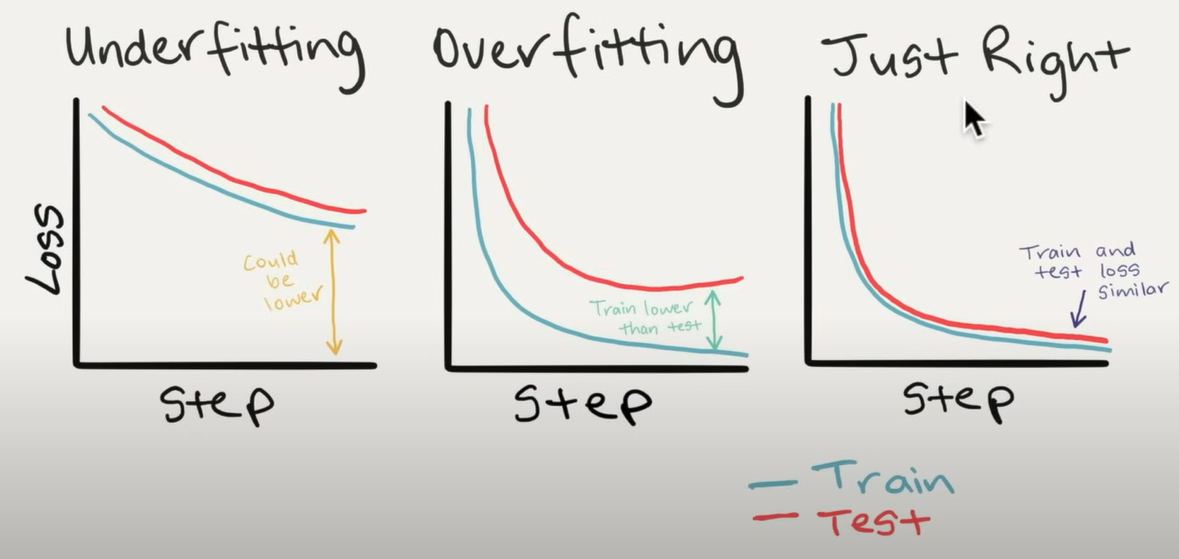

- Dealing with over/underfitting:

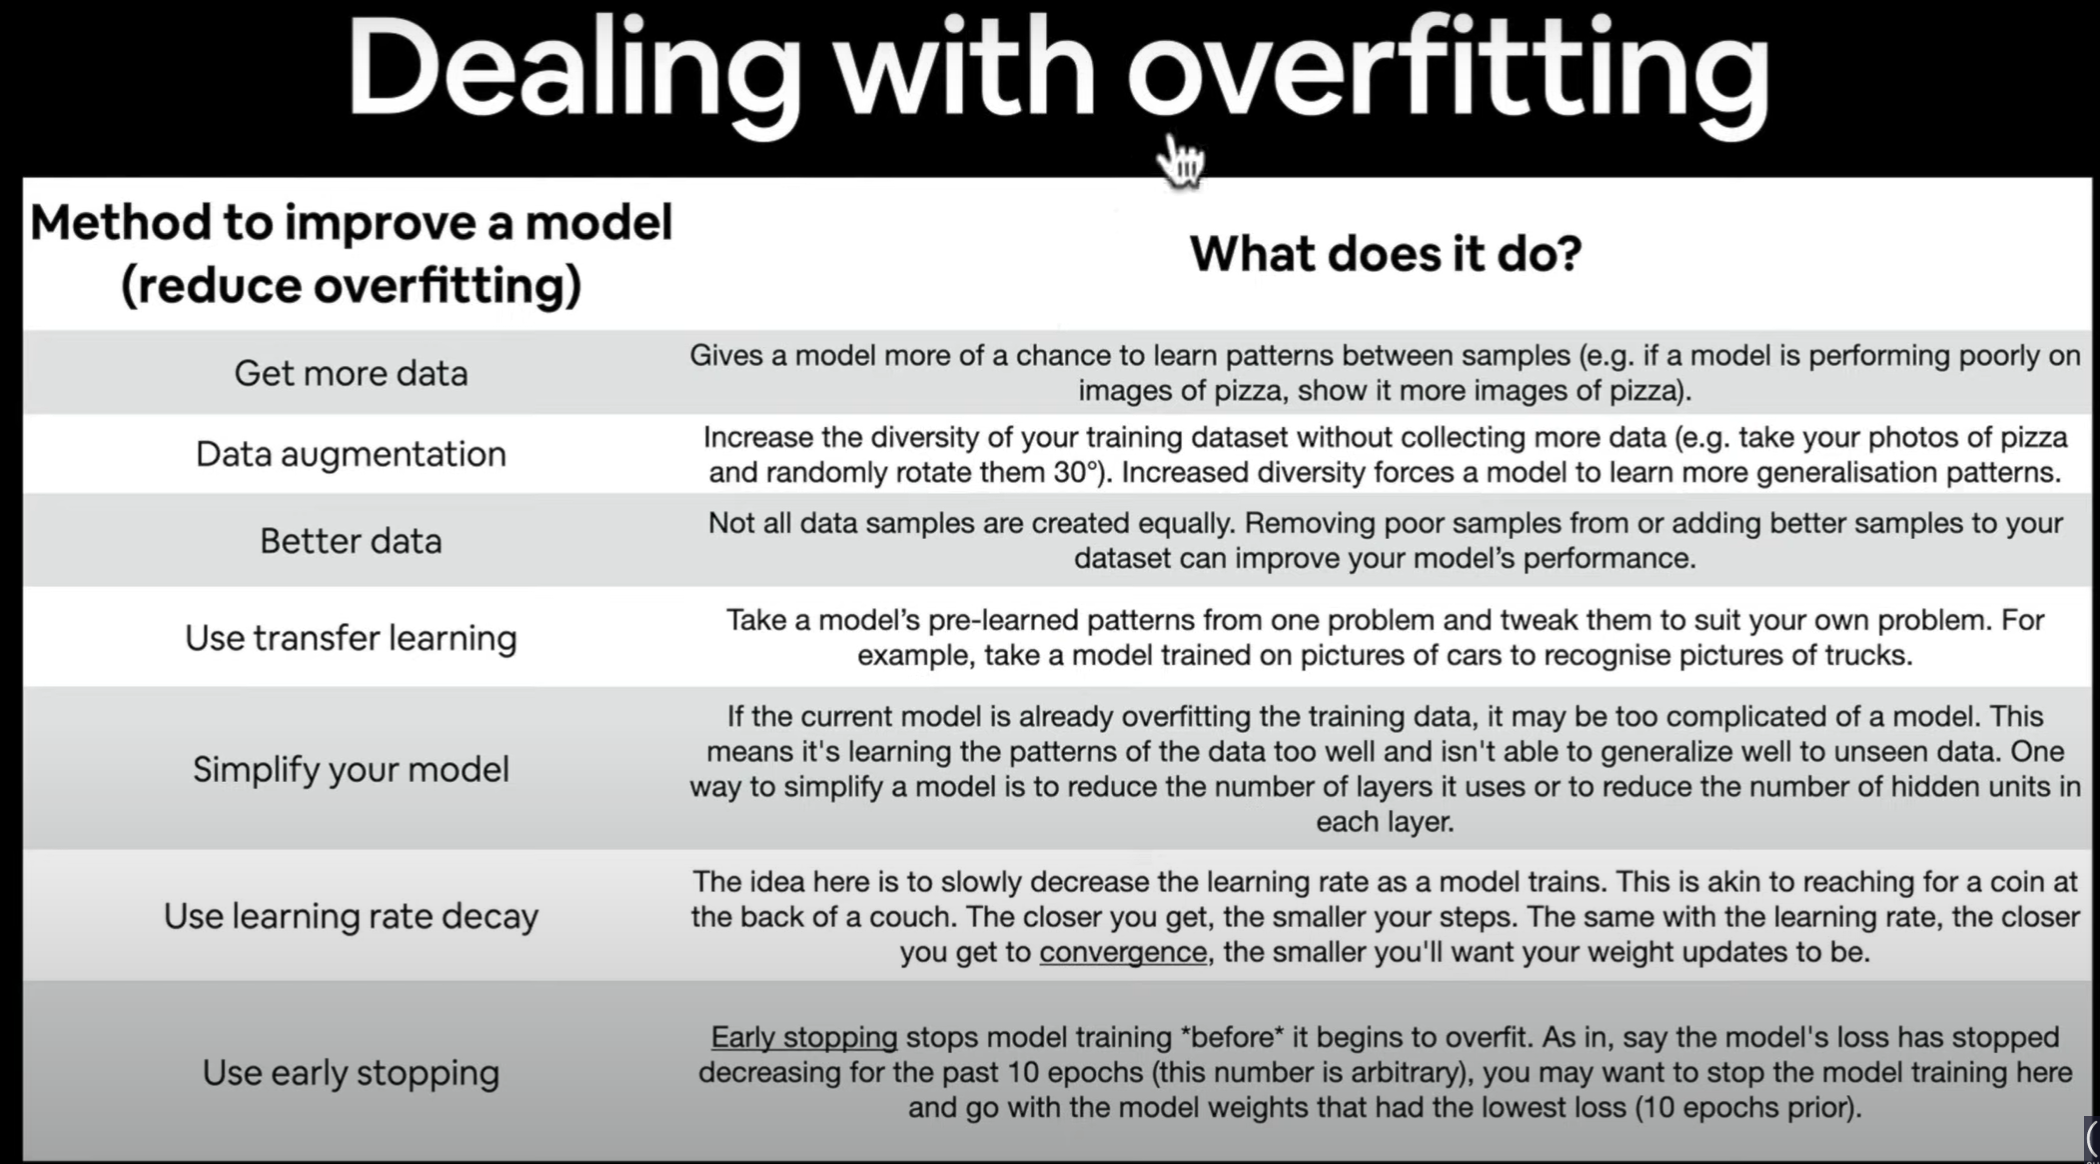
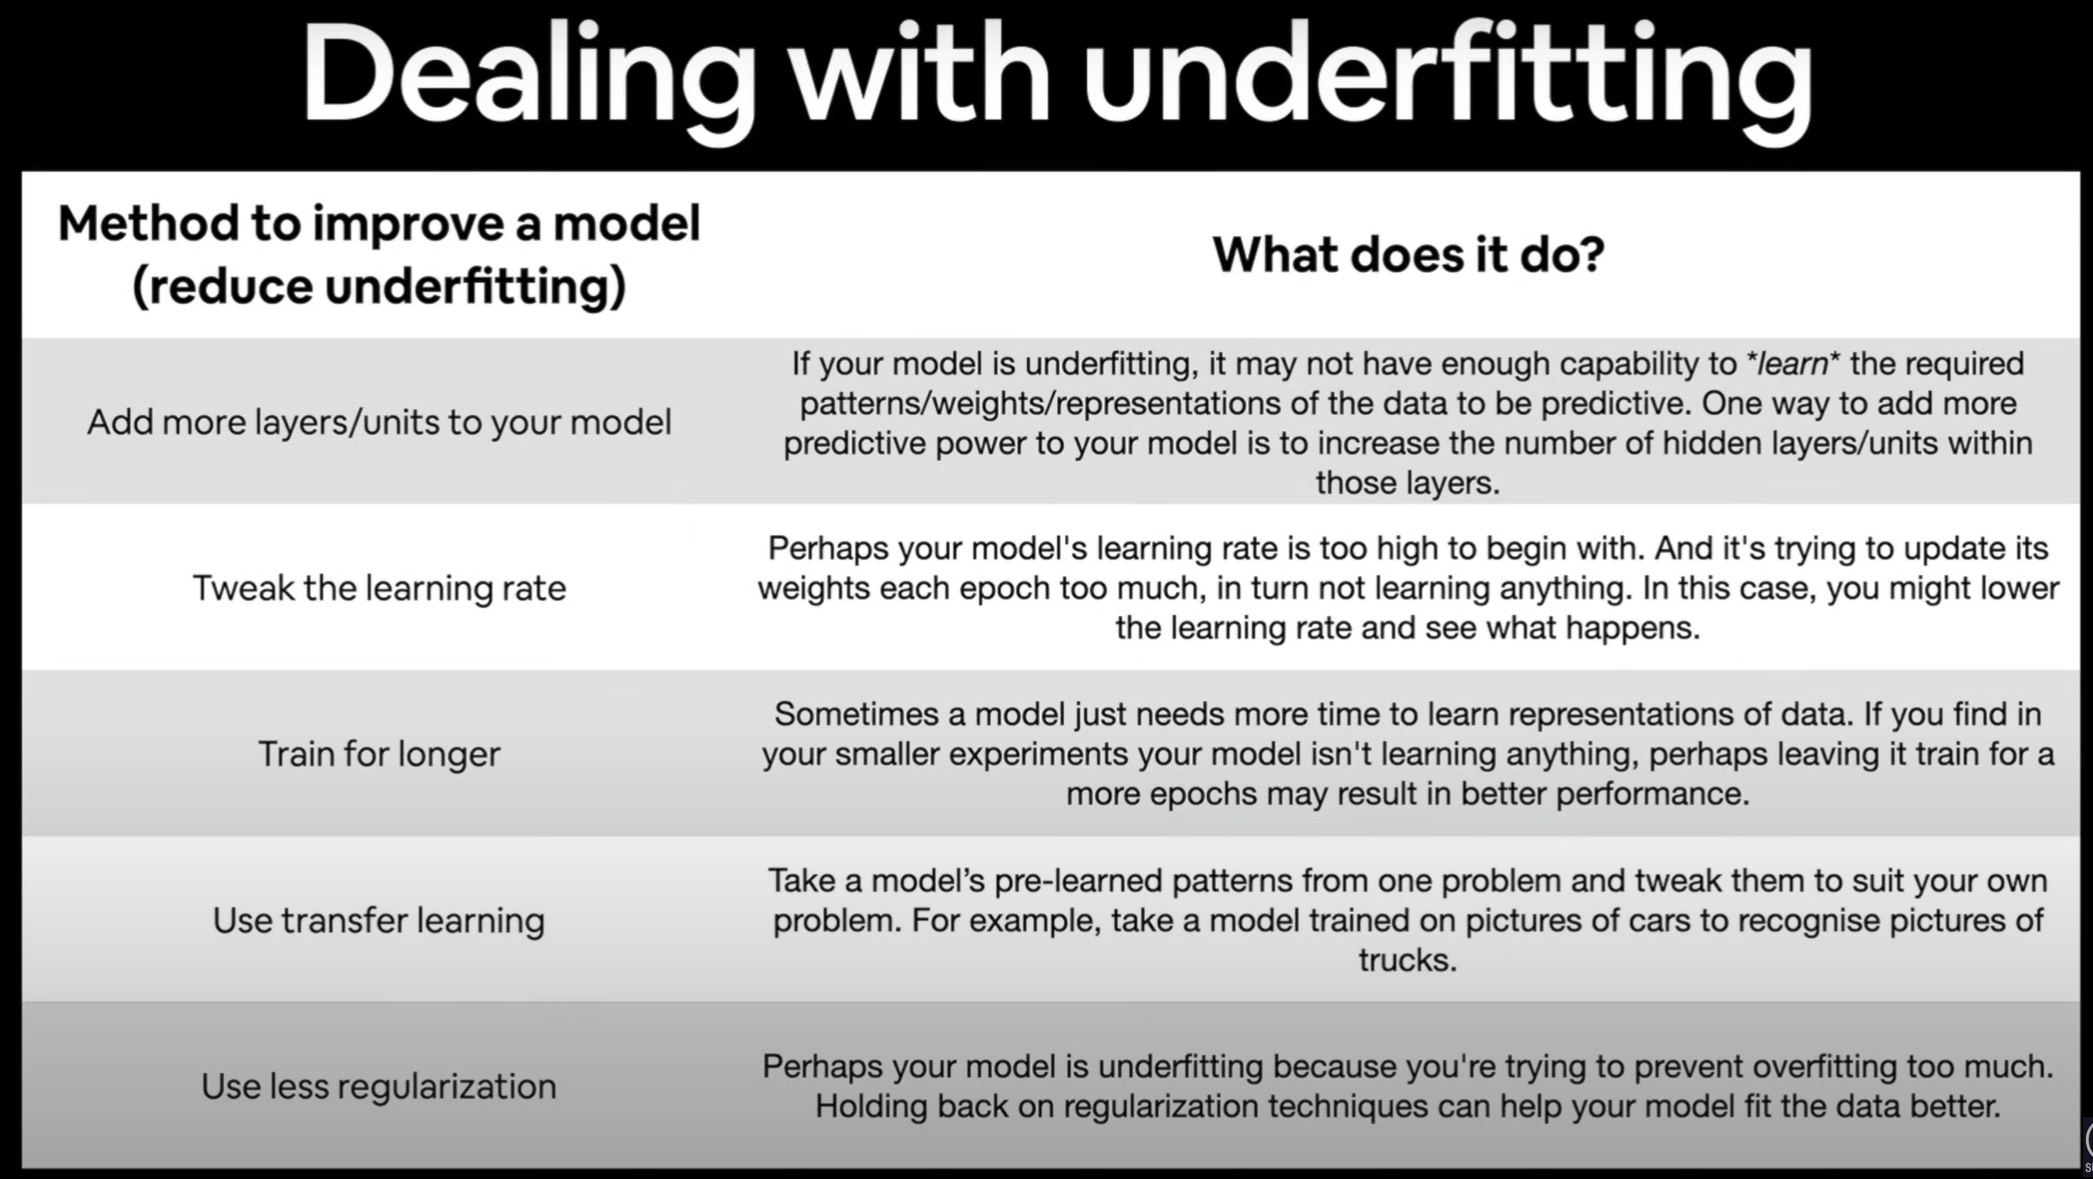

- Look into torchvision.io for testing "images"

# 3/17/2025

Finally beginning mock CNN production! I finished my first model, model_0. I should learn to save it.

**Observations:**
- Data structure is a bit wonky:
    - Data is saved as python dicitonary which I heard is rather slow
    - Whenever data is split, it must be re-indexed, maybe it shouldn't be a dictionary?
        - SOLUTION: SAVE AS ARRAYS WITH DICTIONARY IN EVERY SPOT, INDEX NUMBERING IS REDUNDANT
    - Have to add a dimension in pos: "color" as well. Will do so by encompassing the data in a new array:
        - before: data[0].shape = [channels,bins], after: data[0].shape = [colors=1!!,channels,bins]
        - code is: np.array([data]) which will add a first dimension upfront.
- test loss is lower than train loss, this doesn't make sense. Probably something wrong with train/test step functions.
    - Checked train/test data but it seems the same.   
- Model seems to be lazy. It takes the average of all of the images it saw instead of looking at each image and adapting.
- Look into versioning

# 3/18/2025

**Changes:**
- Added data class to utils.py

**Observations:**
- Most of the data fed into CNN are very weak pulses. May affect learning patterns. 
